<a href="https://colab.research.google.com/github/martasannzz/hola_mundo/blob/main/class/CNN/OCR_with_OpenCV_and_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/OCR_with_OpenCV_and_Tesseract.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/OCR_with_OpenCV_and_Tesseract.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# Introduction to Optical Character Recognition (OCR)

ESTA LIBRERÍA LO QUE HACE ES TRAER DE UNA IMAGEN DIGITALIZADA EL TEXTO PRESENTE. PUEDE SER DESDE DOCUMENTOS QUE SE HAN ESCANEADO, SEÑALES DE TRAFICO... CUALQUIER TIPO DE TEXTO QUE HAYA EN UNA IMAGEN.

Optical Character Recognition, or OCR, is a technology used to convert different types of documents, such as scanned paper documents, PDF files, or images captured by a digital camera, into editable and searchable data. OCR is widely used for digitizing printed texts so that they can be electronically edited, searched, stored more compactly, displayed online, and used in machine processes such as machine translation, text-to-speech, and data mining.

## Challenges in OCR
OCR is not always straightforward due to various challenges, such as:

1. **Font Variability:** Different font styles and sizes can affect the OCR accuracy.
2. **Background Noise:** Images with noisy backgrounds can make text detection difficult.
3. **Layout and Formatting:** Complex layouts with columns, boxes, and other formatting elements can complicate text extraction.
4. **Image Quality:** Low resolution or blurry images can lead to poor OCR results.

## Tesseract OCR

Tesseract is an open-source OCR engine. It can read and recognize text in various languages and is widely regarded as one of the most accurate free OCR engines available.

### Key Functions of Tesseract

1. **Text Detection:** Identifying and extracting textual content from images.
2. **Language Support:** Recognizing multiple languages.
3. **Customization:** Ability to train Tesseract for new fonts or languages.

## Using Tesseract with OpenCV

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It can be used in conjunction with Tesseract to preprocess images for better OCR results.


### Installing Required Libraries


#### Install Tesseract OCR

First, you need to check if Tesseract OCR is installed on your system.

- **For Windows:**
  - Download the installer from [Tesseract at UB Mannheim](https://github.com/UB-Mannheim/tesseract/wiki).
  - Run the installer and remember the path where you install Tesseract (e.g., `C:\Program Files\Tesseract-OCR`).
  - You will need this path to set the environment variable.

- **For macOS:**
  - You can install Tesseract using Homebrew with the command: `brew install tesseract`.

- **For Linux:**
  - Use the package manager to install Tesseract. For example, on Ubuntu, you can use `sudo apt-get install tesseract-ocr`.

#### Set the PATH Environment Variable

If Tesseract is installed but not found, you might need to add its installation directory to your system's PATH.

- **For Windows:**
  - Go to the Control Panel -> System and Security -> System -> Advanced system settings -> Environment Variables.
  - Under System Variables, find and select the variable named PATH, then click Edit.
  - Add the path to the Tesseract installation directory (e.g., `C:\Program Files\Tesseract-OCR`).
  - Click OK to save the changes.

- **For macOS and Linux:**
  - The Tesseract path is usually added to the system PATH automatically. If not, you can add it by modifying the `.bashrc` or `.zshrc` file in your home directory with the command like `export PATH=$PATH:/usr/local/bin/tesseract` (adjust the path as necessary).

#### Specify the Path in Your Python Code

Alternatively, you can specify the path to the Tesseract executable directly in your Python code:

```python
import pytesseract

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update this path

# Rest of your code
```

Replace `C:\Program Files\Tesseract-OCR\tesseract.exe` with the actual path where Tesseract OCR is installed on your system.


```python
!pip install opencv-python
!pip install pytesseract
```

### Basic OCR Example


In [1]:
!pip install opencv-python
!pip install pytesseract
!sudo apt-get install tesseract-ocr

# COMO GOOGLE COLAB ES UN LINUX DEBERIA INSTALARSE CON ESTAS 3 INSTALACIONES

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


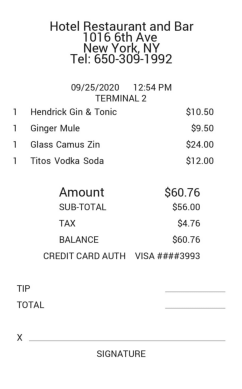

In [2]:
# PODRIAMOS USAR OCR CON LA LIBERIA PILLOW O CON LA OPENCV. VAMOS A USAR LA OPENCV POR EL MOMENTO

import cv2
import urllib
import pytesseract
import matplotlib.pyplot as plt

# PRIMERO NOS DESCARGAMOS UNA IMAGEN EN ESCALA DE GRISES. VEMOS QUE ES UNA FACTURA DE UN RESTAURANTE
url = "https://github.com/ezponda/intro_deep_learning/blob/main/images/restaurant-bar-receipt-sample.jpg?raw=true"
urllib.request.urlretrieve(url, "restaurant-bar-receipt-sample.jpg")

# Path to the image
image_path = "restaurant-bar-receipt-sample.jpg"
# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## `pytesseract.image_to_string`
The function takes an image as input and returns the text contained within that image as a string. It's important to preprocess the image to improve OCR accuracy.

CON pytesseract.image_to_string EXTRAE EL TEXTO EN BRUTO DE LA IMAGEN. ES PROBABLE QUE HAYA CIERTOS ERRORES PERO GENERALMENTE SI LA IMAGEN ES DE BUENA CALIDAD ES BASTANTE PRECISO. VEREMOS QUE GRAN CANTIDAD DE LAS IMAGENES QUE USEMOS NO SERAN DE GRAN CALIDAD ASI QUE VEREMOS METODOS PARA HACER MEJORAR LA CALIDAD DEL OCR DEL TEXTO QUE EXTRAEMOS

In [3]:
text = pytesseract.image_to_string(image)
print(text)

Hotel Restaurant and Bar
6th Ave
New York, NY
Tel: 650-309-1992

09/25/2020 12:54PM

TERMINAL 2
Hendrick Gin & Tonic $10.50
Ginger Mule $9.50
Glass Camus Zin $24.00
Titos Vodka Soda $12.00
Amount $60.76
SUB-TOTAL $56.00
TAX $4.76
BALANCE $60.76

CREDIT CARD AUTH VISA ####3993

TIP
TOTAL

 

SIGNATURE



## Tesseract OCR Options

DENTRO DE Tesseract TENEMOS UNA SERIE DE OPCIONES PARA USAR EL LENGUAJE, EL TIPO DE MODELO QUE VAMOS A USAR, EL MODO EN EL QUE VAMOS A HACER LA SEGMENTACIÓN DE LA PÁGINA... TENEMOS DISTINTOS TIPOS DE MODOS QUE SE LLAMAN EL PSM. HAY QUE PENSAR QUE LA IMAGEN ES UN BLOQUE EN UN TEXTO. POR EJEMPLO HEMOS EXTRAIDO UNA PALABRA DE UNA SEÑAL Y PODEOS ASUMIR QUE SIMPLEMENTE ES UN BLOQUE ENTERO DE TEXTO, UNA COLUMNA, UNA PALABRA, UN CARACTER... ENTONCES A CADA SEGUNDO QUE VAYAMOS A METERLE TENDREMOS QUE ELEGIR UNO DE LOS MODOS QUE HAY. CON ESTO PODEMOS TENER UNA PEQUEÑA EXPLICACION. ESTO SE AÑADE CON EL PARÁMETRO DE config

Tesseract provides several command-line options that can be used to optimize its OCR capabilities. These include specifying the tessdata path, language, page segmentation modes (PSM), and OCR Engine modes (OEM), among others. Let's explore some of these options:

#### Tessdata Directory
- `--tessdata-dir PATH`: Sets the location of the tessdata directory containing language files and other data.

#### Language Options
- `-l LANG[+LANG]`: Sets the language(s) for OCR. Tesseract supports multiple languages, and you can specify more than one language separated by a plus sign.

#### Config Variables
- `-c VAR=VALUE`: Sets various configuration variables. You can use multiple `-c` arguments.

#### Page Segmentation Modes (PSM)
Tesseract offers different page segmentation modes suitable for various image layouts:
1. `0`: Orientation and script detection (OSD) only.
2. `1`: Automatic page segmentation with OSD.
3. `3`: Fully automatic page segmentation, but no OSD. (Default)
4. `4`: Assume a single column of text of variable sizes.
5. `6`: Assume a single uniform block of text.
6. `7`: Treat the image as a single text line.
7. `8`: Treat the image as a single word.
8. `10`: Treat the image as a single character.
9. `11`: Sparse text. Find as much text as possible in no particular order.

#### OCR Engine Modes (OEM)
Tesseract has different OCR engine modes:
1. `0`: Legacy engine only.
2. `1`: Neural nets LSTM engine only.
3. `2`: Legacy + LSTM engines.
4. `3`: Default, based on what is available.


In [ ]:
#!tesseract --help-psm

### Question 1: Use the correct PSM mode for extracting the tex in the next image

```python
config = '--psm <PSM mode>'

text = pytesseract.image_to_string(image, config=config)
```
LA AÑADIMOS CON EL PARÁMETRO DE CONFIGURACIÓN. SIMPLEMENTE HAY QUE PONER '--psm <MODO EN EL QUE LO VAMOS A HACER>'

`PSM mode` can be `0, 1, ..., 11`

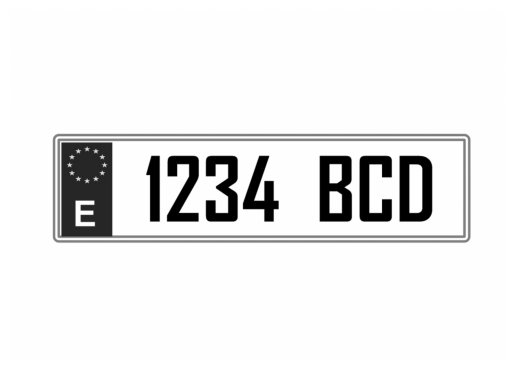

In [4]:
url = 'https://github.com/ezponda/intro_deep_learning/blob/main/images/car_plate.png?raw=true'
urllib.request.urlretrieve(url, "car_plate.png")


image_1 = cv2.imread("car_plate.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image_1, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# SI TENEMOS ESTA IMAGEN Y EJECUTAMOS EL SIGUIENTE CODIGO SIN AÑADIR UNA CONFIGURACIÓN, ES DECIR, NO LE DECIMOS EN QUE MODO TIENE QUE SEGMENTAR LA IMAGEN VEMOS QUE NOS DEVUELVE TEXTO VACIO
text = pytesseract.image_to_string(image_1)
print(text)

### Question 1: Change the `config` parameter

TAMBIEN ES POSIBLE AÑADIRLO COMO LENGUAJE

In [ ]:
config = '--psm <...> -l <...>'
# AQUI HABRIA QUE PONER LA CONFIGURACION Y EL IDIOMA. CONFIGURACION PUEDE SER QUE SEA UNA PIEZA DE TEXTO, UNA COLUMNA... PROBAMOS CON VARIOS Y VEMOS QUE AL MODIFICARLO YA SI QUE SE PUEDE LEER EL TEXTO MEJOR O PEOR, DEPENDERÁ DE LA CALIDAD DEL MODELO
text = pytesseract.image_to_string(image_1, config=config)
print(text)


### `pytesseract.image_to_boxes` for Text Localization

SE TIENEN MÁS FUNCINALIDADES QUE APORTAN INFORMACION SOBRE DONDE ESTÁN LAS PALABRAS QUE SE HAN ENCONTRADO. SI USAMOS image_to_boxes EN VEZ DE image_to_stream, NOS DEVOLVERÁ LAS CAJAS DONDE ESTÁ SITUADO CADA TEXTO.

This function returns the recognized characters and their box boundaries, which is useful for understanding how Tesseract is interpreting the text in an image.


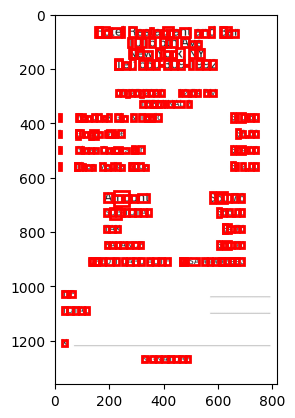

In [6]:
from matplotlib import patches


# Use pytesseract to detect characters and their boxes
config = '--psm 6 -l eng'
boxes = pytesseract.image_to_boxes(image, config=config)

# Plotting the image and boxes
fig, ax = plt.subplots(1)
ax.imshow(image, cmap='gray')

# Adding the boxes to the image
for b in boxes.splitlines(): # AQUI HACEMOS UN PLOR GRACIAS A MATPLOTLIB DE AÑADIR LAS CAJAS EN LAS QUE SE HA DETECTADO COMO CARACTER
    b = b.split(' ')
    ax.add_patch(patches.Rectangle((int(b[1]), image.shape[0] - int(b[2])), int(b[3]) - int(b[1]), int(b[2]) - int(b[4]), fill=False, edgecolor='red', lw=2))

#plt.axis('off')
plt.show()

In [7]:
print(boxes) # AQUI PODEMOS VER QUE INFORMACIÓN TIENE CADA CAJA. CADA CAJA ES UN CARACTER Y NOS INDICA LAS COORDENADAS DE LA CAJA (CÓMO SE ORDENA)

H 149 1281 174 1315 0
o 154 1281 199 1317 0
t 180 1281 202 1306 0
e 205 1281 243 1312 0
l 248 1281 253 1317 0
R 272 1281 297 1315 0
e 301 1281 322 1306 0
s 326 1281 346 1306 0
t 349 1281 362 1312 0
a 366 1281 387 1306 0
u 393 1281 413 1306 0
r 397 1281 433 1315 0
a 420 1281 433 1306 0
n 435 1281 456 1306 0
t 461 1281 499 1312 0
a 514 1281 535 1306 0
n 541 1281 562 1306 0
d 566 1281 587 1317 0
B 606 1281 629 1315 0
a 613 1281 649 1315 0
r 634 1281 674 1306 0
1 270 1241 282 1275 0
0 295 1241 316 1275 0
1 322 1241 334 1275 0
6 347 1241 369 1275 0
6 385 1241 407 1275 0
t 409 1241 422 1272 0
h 427 1241 448 1277 0
A 463 1241 492 1275 0
v 494 1241 516 1266 0
e 518 1241 539 1266 0
N 272 1201 297 1235 0
e 280 1201 323 1235 0
w 303 1201 359 1226 0
Y 373 1195 389 1237 0
o 373 1201 400 1235 0
r 403 1201 425 1226 0
k 431 1201 444 1226 0
, 447 1195 475 1237 0
N 492 1201 517 1235 0
Y 523 1201 550 1235 0
T 222 1161 245 1197 0
e 222 1161 248 1195 0
l 250 1161 271 1186 0
: 277 1161 293 1197 0
6 311 1161

### `pytesseract.image_to_data`

image_to_data` LO QUE HACE ES DEVOLVERNOS UN LISTADO DE TODAS LAS CARACTERÍSTICAS QUE TIENE DE CARACTER, DE PALABRA... LUEGO ESA TABLA PODEMOS CONVERTIRLA A DATAFRAME

The `pytesseract.image_to_data` function provides a more detailed output compared to image_to_string. It not only extracts text but also gives information about the positioning, confidence scores, and other details for each detected textual element. This function is particularly useful for applications where you need in-depth data about the text layout in an image.

In [8]:
import pandas as pd
config = '--psm 6 -l eng'
data = pytesseract.image_to_data(image,config=config, output_type=pytesseract.Output.DICT) # HACEMOS image_to_data CON NUESTRA CONFIGURACIÓN Y PONEMOS QUE LA SLAIDA SEA UN DICCIONARIO
print(data.keys())
df = pd.DataFrame(data)
df.head(10)


# VEMOS QUE LAS KEYS QUE TIENE VAN A SER LAS CABECERAS DE NUETSRA TABLA

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,819,1361,-1,
1,2,1,1,0,0,0,13,44,734,1236,-1,
2,3,1,1,1,0,0,13,44,734,1236,-1,
3,4,1,1,1,1,0,149,44,525,36,-1,
4,5,1,1,1,1,1,149,44,104,36,96,Hotel
5,5,1,1,1,1,2,272,46,227,34,96,Restaurant
6,5,1,1,1,1,3,514,44,73,36,96,and
7,5,1,1,1,1,4,606,46,68,34,95,Bar
8,4,1,1,1,2,0,270,84,269,36,-1,
9,5,1,1,1,2,1,270,86,99,34,96,1016


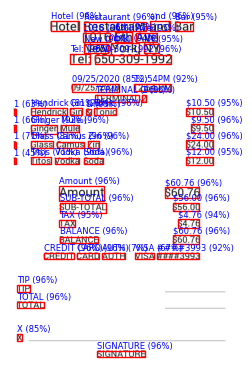

In [9]:
# A CONTINUACION VAMOS A PINTAR LAS CAJAS Y TODA LA INFORMACION QUE NOS DEVUELVE ESA FUCNION.
# ADEMÁS NOS DEVUELVE EL VALOR DE CONFIANZA (conf) SI SE ACERCA A 100 NOS ESTARÁ DICIENDO QUE ES MUY PROBABLE QUE LA PALABRA SEA HOTEL. SI HAY RUIDO EN LA IMAGEN O SE VE MAL QUIZAS BAJA A 30
# PODEMOS FIARNOS MÁS O MENOS DE LA PALABRA QUE HA INFERIDO DEPENDIENDO DE LA confidence

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.imshow(image, cmap='gray')
plt.axis('off')

# Iterate over each word
for i in range(len(df)):
    # Only consider entries with a confidence level
    if df['conf'][i] > 0:
        # Extract coordinates and dimensions of the bounding box
        (x, y, w, h) = (df['left'][i], df['top'][i], df['width'][i], df['height'][i])
        plt.gca().add_patch(Rectangle((x, y), w, h, fill=False, edgecolor='red', lw=1))
        text = f"{df['text'][i]} ({df['conf'][i]}%)"
        plt.gca().text(x, y - 10, text, color='blue', fontsize=6)

plt.show()

# aqui representamos cada una de las palabras que ha ido eligiendo junto con el % de acierto que ha tenido

### Question 2: Create a script to extract the amount from the bill.

COMO PRÁCTICA VAMOS A TRATAR DE EXTRAER EL TOTAL DE NUESTRA CUENTA

Hint: You can use the `line_num` field or `word_num` field from the output DataFrame.

In [10]:
# ENTONCES COGEMOS EL DATAFRAME E INTENTAMOS ENCONTRAR EL AMOUNT/DINERO TOTAL.

amount = ''
for i, row in df.iterrows():
    line_num = row['line_num']
    word_num = row['word_num']
    text = row['text']
    print(line_num, word_num, text)

0 0 
0 0 
0 0 
1 0 
1 1 Hotel
1 2 Restaurant
1 3 and
1 4 Bar
2 0 
2 1 1016
2 2 6th
2 3 Ave
3 0 
3 1 New
3 2 York,
3 3 NY
4 0 
4 1 Tel:
4 2 650-309-1992
5 0 
5 1 09/25/2020
5 2 12:54PM
6 0 
6 1 TERMINAL
6 2 2
7 0 
7 1 1
7 2 Hendrick
7 3 Gin
7 4 &
7 5 Tonic
7 6 $10.50
8 0 
8 1 1
8 2 Ginger
8 3 Mule
8 4 $9.50
9 0 
9 1 1
9 2 Glass
9 3 Camus
9 4 Zin
9 5 $24.00
10 0 
10 1 1
10 2 Titos
10 3 Vodka
10 4 Soda
10 5 $12.00
11 0 
11 1 Amount
11 2 $60.76
12 0 
12 1 SUB-TOTAL
12 2 $56.00
13 0 
13 1 TAX
13 2 $4.76
14 0 
14 1 BALANCE
14 2 $60.76
15 0 
15 1 CREDIT
15 2 CARD
15 3 AUTH
15 4 VISA
15 5 ####3993
16 0 
16 1 TIP
17 0 
17 1 TOTAL
18 0 
18 1 X
19 0 
19 1 SIGNATURE


# Image Preprocessing for Enhancing OCR Quality

NORMALMENTE LAS IMAGENES SON MUCHAA PEOR CALIDAD QUE EL EJEMPLO ANTERIOR.

Image preprocessing is a crucial step in improving the accuracy of Optical Character Recognition (OCR). Preprocessing techniques can help mitigate issues such as noise, distortion, and variable lighting in images, which can significantly impact the performance of OCR algorithms.

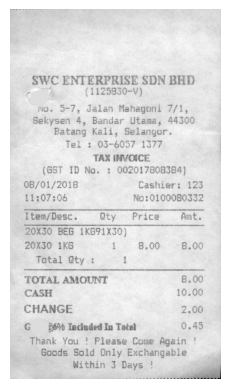

In [13]:
url = 'https://github.com/ezponda/intro_deep_learning/blob/main/images/bad_quality_receipt.png?raw=true'
urllib.request.urlretrieve(url, "bad_quality_receipt.png")

image_bad = cv2.imread('bad_quality_receipt.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image_bad, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
config = '--psm 6 -l eng'

text = pytesseract.image_to_string(image_bad, config=config)
print(text)

# AL SER DE MALA CLAIDAD LA IMAGEN, AL EJECUTAR EL image_to_string HABRÁ ERRORES. AUN ASI CONSIGUE SACAR COSAS PERO LOS NÚEMROS ESTAN EQUIVOCADOS ETC
# HABRA QUE TRATAR DE MEJORAR LA CALIDAD DE LA IMAGEN. HAY UNA INFINIDAD DE TECNICAS. YA VIMOS ALGUNAS EN EL TUTORIAL DE OPENCV

SWC ENTERPRISE SDN BHD
ay (1125850-V)}
no. 5-7, Jalan Mahagoni 7/1,
Sekysen 4, Bandar Utama, 44300
Batang Kali, Selangor.
Tel : 03-6057 1377 |
TAX INVOICE
(GST ID No. : 002017808384)
06/01/2018 Cashier: 123
11:07:06 No:0100080332
Item/Desc. Qty Price Amt.
2OX30 BEG 1KG91X30)
20X30 1KG i 8.00 8.00
Total Qty : i
TOTAL AMOUNT 8.00
CASH 10.00
CHANGE 2,00
G 86% Incladed In Totel 0.45
Thank You ! Please Come Again !
Goods Sold Only Exchangable
Within 3 Days | i :



## Histogram Equalization Using CLAHE

UNA DE LAS TÉCNICAS DE MEJORA DE CALIDAD DE LA IMAGEN ES LA DE ECUALIZAR EL HISTOGRAMA COMO VEIAMOS EN LA PRÁCTIVA DE OPENCV

Contrast Limited Adaptive Histogram Equalization (CLAHE) is an advanced form of histogram equalization that is used to improve the local contrast of an image. Unlike standard histogram equalization, which applies the same contrast adjustment across the entire image, CLAHE divides the image into smaller blocks and applies histogram equalization to each of these blocks independently. This method can be particularly effective for OCR purposes as it enhances the local contrast and can make the text in an image more readable, especially in cases where the lighting varies across the image.

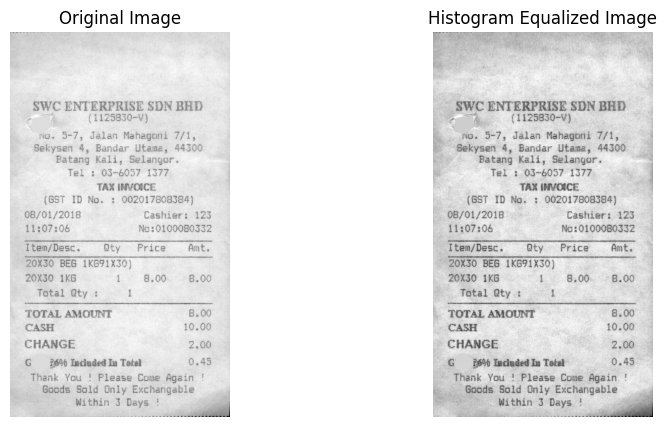

In [15]:
import cv2
import matplotlib.pyplot as plt

def equalize_histogram(gray_image):
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
    return clahe.apply(gray_image)


equalized_image = equalize_histogram(image_bad)

# Display both images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_bad, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

# AL ECUALIZAR LA IMAGEN VEMOS QUE AUMENTA EL CONTRASTE Y AHI YA PODREMOS COMPRAR SI LA CALIDAD DE LA IMAGEN ECUALIZADA ES DE MAYOR CALIDAD QUE LA ORIGINAL O NO

In [16]:
config = '--psm 6 -l eng'

text = pytesseract.image_to_string(equalized_image, config=config)
print(text)

SWC ENTERPRISE SDN BHD
oh (1125850-V}
fo. 5-7, Jalan Mahagoni 7/1, :
. ekysen 4, Bandar Utama, 44300
Batang Kali, Selangor. ;
Tel : 03-6057 1377 ;
TAX INVOICE |
{GSY ID No. : 002017808384}
08/01/2018 Cashier: 123
11:07:06 No: 0100080332
Item/Desc. Qty Price Amt.
2OX30 BEG 1KG91X30}
20X30 1KG i 8.00 8.00
Total Qty : 1
TOTAL AMOUNT 8.00
CASH 10.00
CHANGE 2,004
G 86% Included In Totel 0.45
Thank You ! Please Come Again '
. Goods Sold Gnly Exchangable :
mes Within 3 Days ! : il



In [17]:
import cv2
import pytesseract
from ipywidgets import interact, IntSlider, FloatSlider
from IPython.display import HTML, display

def apply_clahe(clipLimit, tileGridSize):
    # Ensure the image is in BGR format
    if len(image_bad.shape) == 2 or image_bad.shape[2] == 1:  # Image is already grayscale
        gray_image = image_bad
    else:
        gray_image = cv2.cvtColor(image_bad, cv2.COLOR_BGR2GRAY)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(tileGridSize, tileGridSize))

    # Apply CLAHE to the grayscale image
    clahe_image = clahe.apply(gray_image)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(clahe_image, cmap='gray')
    plt.title('CLAHE Enhanced Image')
    plt.axis('off')

    plt.show()

    # Perform OCR on the CLAHE-enhanced image
    config = '--psm 6 -l eng'
    text = pytesseract.image_to_string(clahe_image, config=config)
    # Print the OCR results in a "cooler" text box
    #print("\033[1;32;40m OCR Result: \n{}\033[0m".format(text))
    print("OCR Result: \n{}".format(text))


# Interactive widget for CLAHE parameters
interact(apply_clahe,
         clipLimit=FloatSlider(min=0, max=5, step=0.1, value=2, description='Clip Limit'),
         tileGridSize=IntSlider(min=1, max=32, step=1, value=8, description='Tile Grid Size'))

# ADEMAS PODEMOS JUGAR CON LOS VALORES AL IGUAL QUE HACEMOS EN LA PRACTICA DE OPENCV: CLIP LIMIT Y EL TAMAÑO DE LA CAJA EN LA QUE VAMOS A HACER LA ECUALIZACION ADAPTATIVA
# VAMOS VIENDO SI MEJORA O EMPEORA EL RESULTADO QUE VA HACIENDO CADA VEZ QUE HACEMOS UN CAMBIO
# AQUI VEMOS QUE AL SUBIR MUCHO EL CLIP LIMIT EMPEORA LA CALIDAD

interactive(children=(FloatSlider(value=2.0, description='Clip Limit', max=5.0), IntSlider(value=8, descriptio…

<function __main__.apply_clahe(clipLimit, tileGridSize)>

## Thresholding

EN OCR TAMBIEN SE SUELE BINARIZAR. ES DECIR, ESTABLECER UN UMBRAL A PARTIR DEL CUAL LA IMAGEN ES O BLANCA O NEGRA. LO MALO DE ESTA TÉCNICA ES QUE CUANDO HAYA MUCHO RUIDO, SE VERAN PUNTOS NEGROS/SE VERÁ DE PEOR CALIDAD

Thresholding can be used to create a binary image from a grayscale image. It enhances the contrast between the text and the background, which is often beneficial for OCR.


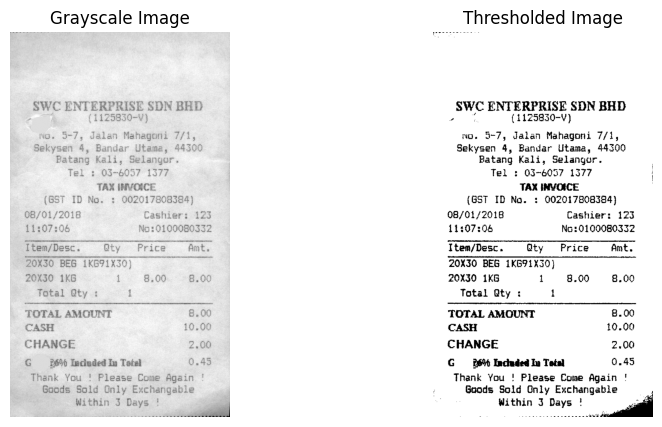

In [18]:
# CON LA FUNCION QUE VEIAMOS EN LA PRÁCTICA DE OPENCV.
# EL UMBRAL MÁS SENCILLO ES EL ALGORITMO QUE SE LLAMA THRESH_OTSU, EL CUAL COGE EL HISTOGRAMA DE NUESTRA IMAGEN Y CLACULA EL UMBRAL PROMEDIO QUE HACE QUE SE SEPARE MEJOR EL BLANCO DEL NEGRO

def apply_thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Apply thresholding
thresh_image = apply_thresholding(image_bad)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_bad, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

# VEMOS EL RESULATDO DE LA BINARIZACION CON EL UMBRAL DE THRESH_OTSU:
# VEMOS QUE SE HA QUITADO UN POCO DE RUIDO. A CONITNUACION VEMOS SI EL RESULTADO ES MEJOR O PEOR

In [19]:
config = '--psm 6 -l eng'

text = pytesseract.image_to_string(thresh_image, config=config)
print(text)

SWC ENTERPRISE SDN BHD
- 4 (1125950-V)
ng. +7, Jalan Mahagoni 7/1,
Sekysen 4, Bandar Utama, 44300
Ratang Kali, Selangor. |
Tel : 03-6057 1377 ,
TAX INVOICE
(GST ID No. : 002017808384)
08/01/2018 Cashier: 123
11:07:06 No 20100080332
Item/Desc. Qty Price Amt.
20X30 BEG 1KG91X50}
20X30 1KG 1 8.00 8.00
Total Qty : 1
TOTAL AMOUNT 8.00
CASH 10.00
CHANGE 2.00
G 26% Included In Toisl 0.45
Thank You ! Please Come Again !
: Gaods Sold Only Exchangable
Within 3 Days ! “a :



In [20]:
# A CONTINAUCION VAMOS A JUGAR CON TODOS LOS PARÁMETROS QUE HEMOS VISTO HASTA AHORA.

from ipywidgets import interact, widgets


def interactive_ocr_preprocessing(clipLimit, tileGridSize, thresh_type, threshold, block_size, C):
    # Ensure the image is in BGR format
    if len(image_bad.shape) == 2 or image_bad.shape[2] == 1:  # Image is already grayscale
        gray_image = image_bad
    else:
        gray_image = cv2.cvtColor(image_bad, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE to the grayscale image, if selected
    if clipLimit > 0 and tileGridSize > 0:
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(tileGridSize, tileGridSize))
        processed_image = clahe.apply(gray_image)
    else:
        processed_image = gray_image

    # Apply thresholding based on the user's choice
    if thresh_type == 'Binary':
        _, processed_image = cv2.threshold(processed_image, threshold, 255, cv2.THRESH_BINARY)
    elif thresh_type == 'Adaptive Mean':
        processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
    elif thresh_type == 'Adaptive Gaussian':
        processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

    # Display the processed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.show()

    # Perform OCR on the processed image
    config = '--psm 6 -l eng'
    text = pytesseract.image_to_string(processed_image, config=config)
    # Print the OCR results in a styled format
    print("OCR Result: \n{}".format(text))

interact(interactive_ocr_preprocessing,
         clipLimit=widgets.FloatSlider(min=-1, max=5, step=0.1, value=0, description='CLAHE CL', continuous_update=False),
         tileGridSize=widgets.IntSlider(min=0, max=16, step=1, value=0, description='CLAHE Grid-Size', continuous_update=False),
         thresh_type=widgets.Dropdown(options=['None', 'Binary', 'Adaptive Mean', 'Adaptive Gaussian'], value='None', description='Threshold Type'),
         threshold=widgets.IntSlider(min=0, max=255, step=1, value=127, description='Binary Th', continuous_update=False),
         block_size=widgets.IntSlider(min=3, max=21, step=1, value=11, description='Adpt Block Size', continuous_update=False, disabled=False),
         C=widgets.IntSlider(min=0, max=20, step=1, value=2, description='Adpt C Value', continuous_update=False)
        );


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='CLAHE CL', max=5.0, min=-1.…

## Noise Removal

HAY VARUAS MANERAS DE ELIMINAR EL RUIDO DE LA IMAGEN. HAY IMAGENES QUE TIENEN MUCHO MÁS RUIDO. SE PODRÑIA MODIFICAR EL CONTRASTE QUE VEIAMOS EN LAS PRÁCTICAS.
PARA ELIMINAR EL RUIDO LA MANERA MÁS HABITUAL (QUE NO ES LA MÁS POTENTE) ES HACER UN FILTRO medianBlur  

Removing noise from the image can help in reducing the OCR errors, especially when dealing with low-quality scans or photographs.

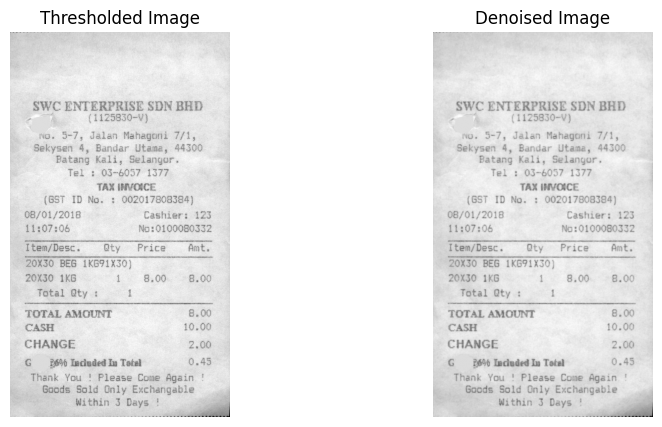

In [21]:
def remove_noise(image):
    return cv2.medianBlur(image, 3)

# Apply noise removal
denoised_image = remove_noise(image_bad)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_bad, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

## Morphological Operations

LUEGO HAY OTRAS TÉNICAS MÁS COMPLICADAS QUE SON EL EROSION Y DIALATION QUE CONSISTE O EN AUMENTAR LOS PÍXELES QUE HAY AL REDDOR DE LAS FRONTERAS DE LOS OBJETOS (SOBRETODO PARA QUE SE VEA MEJOR LO QUE ESTÁ DENTRO DEL FONDO) O LO CONTRARIO  
LUEGO ADEMAS HAY OPERACIONES QUE HACEN PRIMERO UNA Y LUEGO OTRA, ETC

Morphological operations are a set of operations that process images based on shapes. They apply a structuring element to an input image and produce an output image. The primary operations are dilation and erosion, which can be combined to form operations like opening and closing. These operations are particularly useful in the preprocessing stage of OCR to enhance the visibility of text.

### Structuring Element

The structuring element is a matrix that decides the nature of the operation being applied to the image. The shape and size of the structuring element affect the outcome of the morphological operation. Common shapes include rectangles, ellipses, and crosses. In OpenCV, `cv2.getStructuringElement()` is used to create a structuring element.

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# This code creates a 5x5 rectangular structuring element.
print(kernel)

### Dilation

Dilation adds pixels to the boundaries of objects in an image. It can be used to increase the size of foreground objects.

**Code Example:**

```python
dilated_image = cv2.dilate(src_image, kernel, iterations=1)
```

Here, `src_image` is the source image, `kernel` is the structuring element, and `iterations=1` indicates that the dilation operation should be applied once.

### Erosion

Erosion removes pixels at the boundaries of objects. It is used to diminish the features of an image.

**Code Example:**

```python
eroded_image = cv2.erode(src_image, kernel, iterations=1)
```

### Opening and Closing

- **Opening** is erosion followed by dilation. It is useful in removing noise.
- **Closing** is dilation followed by erosion. It is useful in closing small holes or gaps in the foreground.

**Code Example for Opening:**

```python
opening_image = cv2.morphologyEx(src_image, cv2.MORPH_OPEN, kernel)
```

**Code Example for Closing:**

```python
closing_image = cv2.morphologyEx(src_image, cv2.MORPH_CLOSE, kernel)
```


In [22]:
# Apply dilation
dilated_image = cv2.dilate(equalized_image, kernel, iterations=1)

# Apply erosion
eroded_image = cv2.erode(equalized_image, kernel, iterations=1)

# Apply opening
opening_image = cv2.morphologyEx(equalized_image, cv2.MORPH_OPEN, kernel)

# Apply closing
closing_image = cv2.morphologyEx(equalized_image, cv2.MORPH_CLOSE, kernel)

# Plotting the images
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(equalized_image, cmap='gray')
axs[0].set_title('equalized_image')
axs[1].imshow(dilated_image, cmap='gray')
axs[1].set_title('Dilated')
axs[2].imshow(eroded_image, cmap='gray')
axs[2].set_title('Eroded')
axs[3].imshow(opening_image, cmap='gray')
axs[3].set_title('Opening')
axs[4].imshow(closing_image, cmap='gray')
axs[4].set_title('Closing')

for ax in axs:
    ax.axis('off')
plt.show()

NameError: name 'kernel' is not defined

In [ ]:
# Apply dilation
dilated_image = cv2.dilate(image_bad, kernel, iterations=1)

# Apply erosion
eroded_image = cv2.erode(image_bad, kernel, iterations=1)

# Apply opening
opening_image = cv2.morphologyEx(image_bad, cv2.MORPH_OPEN, kernel)

# Apply closing
closing_image = cv2.morphologyEx(image_bad, cv2.MORPH_CLOSE, kernel)

# Plotting the images
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(image_bad, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(dilated_image, cmap='gray')
axs[1].set_title('Dilated')
axs[2].imshow(eroded_image, cmap='gray')
axs[2].set_title('Eroded')
axs[3].imshow(opening_image, cmap='gray')
axs[3].set_title('Opening')
axs[4].imshow(closing_image, cmap='gray')
axs[4].set_title('Closing')

for ax in axs:
    ax.axis('off')
plt.show()

## Question 3: Use image processing techniques for obtain a better OCR result